# <center> Optimization of a stopping strategy </center>

## <center> Basic functions and Monte-Carlo </center>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.optimize import minimize
from random import random
from scipy.optimize import minimize_scalar

## Monte Carlo 

### Trajectories generation

In [7]:
def simul_s(S0, sigma, dt, N, nb_traj, seed = 42):
    np.random.seed(seed)
    epsilons = np.random.normal(size=(nb_traj, N))
    e = ((-0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * epsilons).cumsum(axis=1)
    trajectories = S0*np.ones((nb_traj, N+1))
    trajectories[:,1:] = S0*np.exp(e)
    return trajectories
sigma = 0.2
dt = 1/252
N = 22
nb_traj = 2**15
S = simul_s(10, sigma, dt, N, nb_traj)

### Samples generation

In [8]:
def s_to_a(trajectories):
    return trajectories.cumsum(axis=1)/np.ones(trajectories.shape).cumsum(axis=1)
A = s_to_a(S)

### Plot 

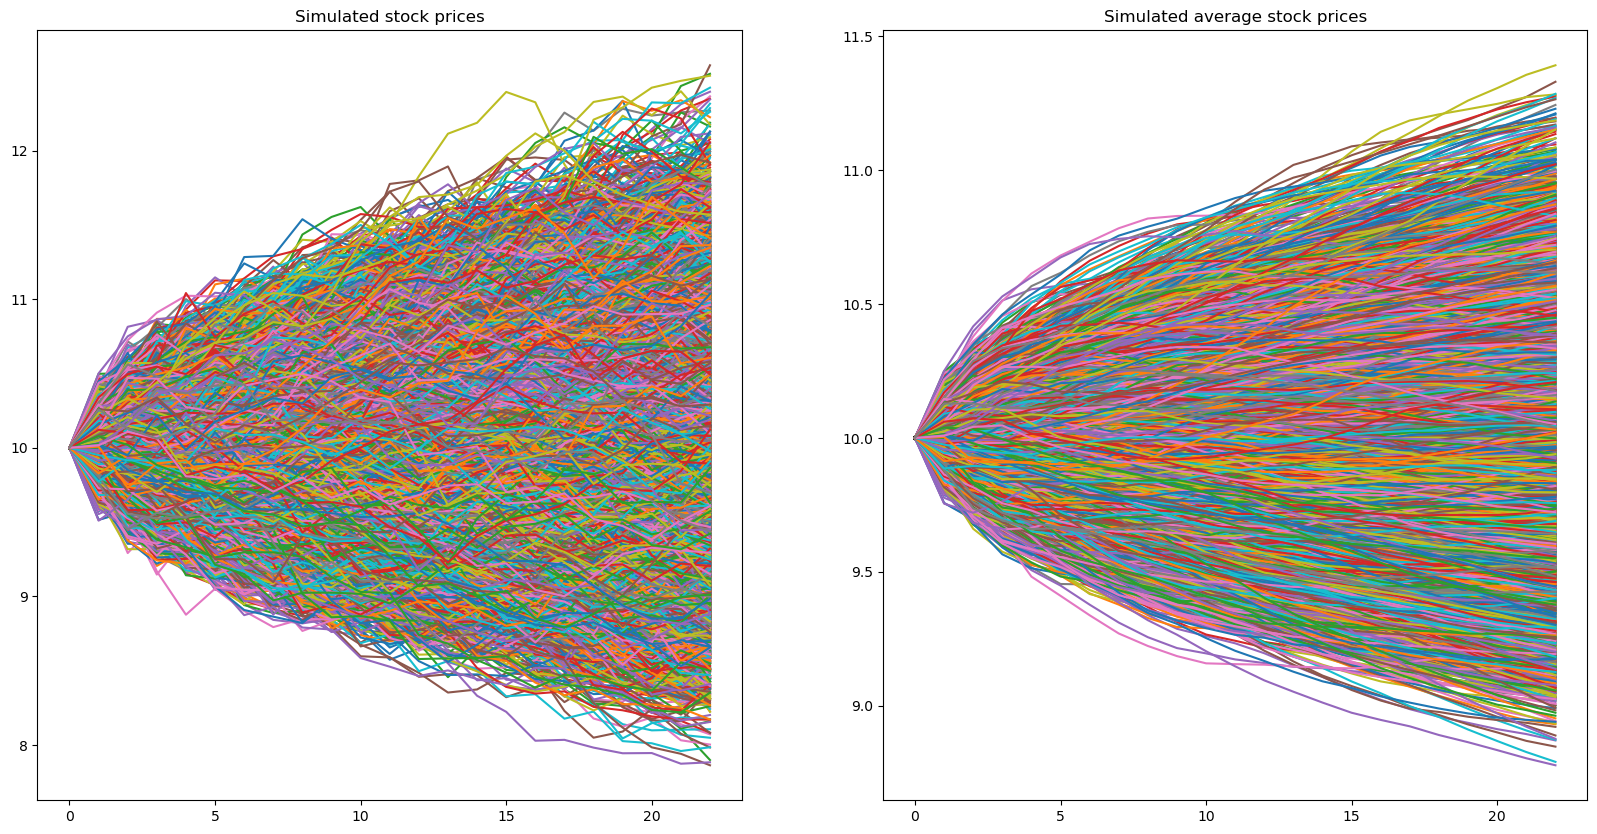

In [156]:
figure, axis = plt.subplots(1, 2, figsize = (20, 10))
axis[0].plot(S.T)
axis[0].set_title('Simulated stock prices') 
axis[1].plot(A.T)
axis[1].set_title('Simulated average stock prices') 
plt.show()

### Approximation with Monte Carlo

In [9]:
#confidence interval
a_s = s_to_a(S)[:,-1]/S[:,-1]
(a_s.mean(), a_s.mean()-1.96*np.std(a_s)/np.sqrt(len(S)), a_s.mean()+1.96*np.std(a_s)/np.sqrt(len(S)))

(1.0016962661837403, 1.0013309556401597, 1.0020615767273209)

### Mathematical calculation   

In [10]:
np.exp(np.arange(N+1)*sigma**2*dt).sum()/(N+1)

1.0017481122115626

## Strategy and optimization

In [11]:
def strat_ratio(a, trajectories):
    A =s_to_a(trajectories)
    st_a = np.where(((A-a*trajectories)>=0).sum(axis=0)==1)[0]
    if len(st_a) == 0 :
        st_a = math.inf
    stopping_time_a = min(np.min(st_a), trajectories.shape[1]-1)
    return (A[:,stopping_time_a]/trajectories[:,stopping_time_a]).mean()
strat_ratio(2, S)

1.0016962661837403

In [13]:
objective_function = lambda a: -strat_ratio(a, S)

initial_guess = 1

result = minimize_scalar(objective_function, bounds=(1, 2))

# Extract the optimal value of 'a'
optimal_a = result.x

print("Optimal value of 'a':", optimal_a)
print("Maximum value of strat_ratio:", -result.fun)

Optimal value of 'a': 1.9999940391390134
Maximum value of strat_ratio: 1.0016962661837403
